In [ ]:
'''
    The main difference between feature `extraction` and `selection` is that we project
    the data to a new feature subspace.

    These tricks can be very handy not only to reduce the amount of storage space but also 
    to maximize the accuracy of learning algirthms that are non-regularized.

    The first two methods describes how to reduce dimensions in a linear way ( LDA, PCA )
'''

# Principal Component Analysis ( PCA )

In [ ]:
'''
    * In a nutshell, what it does is find the directions where most variance occures in a dataset.
    Using these new orthogonal vectore ( PCA vectors ) a new subspace can be found.

    * It is highly sensitive to data scaling so the data needs to be standardized.
'''

## Raw Imp.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv( 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data' , header = None)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=0, stratify=y )  

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
X_train_std = sc.fit_transform( X_train )
X_test_std = sc.transform( X_test )

In [ ]:
'''
    * We will start by computing the covariance matrix of our dataset.
    As you can see, because we have standardized the dataset, the mean of each 
    feature would be 0 ( X_j - \mu{j} ). So, when we multiply all of the features'
    variances we should conclude the relationship between them upon the sign
    of the result. If it is positive they are correlated, otherwise not.

    * Obtaining the eign vectors/values will give us the most `varied` features.
'''

In [30]:
import numpy as np

In [140]:
cov_matrix = np.cov( X_train_std.T )

In [141]:
eign_vals, eign_vecs = np.linalg.eig( cov_matrix )

In [142]:
tot = sum(eign_vals)

In [143]:
var_ratio = [ ( i / tot ) for i in sorted(eign_vals, reverse = True )  ] 

In [144]:
cum_var_ratio = np.cumsum( var_ratio )

In [145]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Pirncipal Component Index')

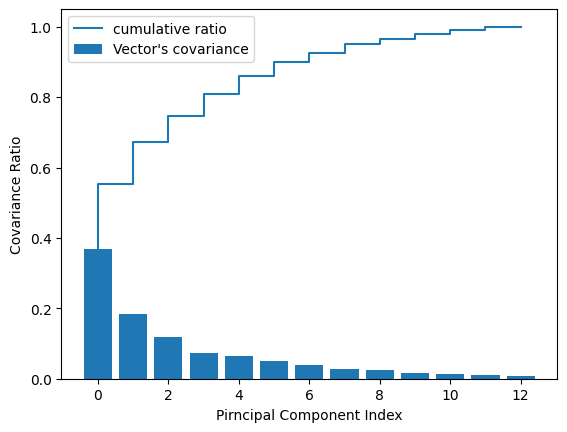

In [146]:
plt.step( range(len(eign_vals)), cum_var_ratio, label = "cumulative ratio")
plt.bar( range(len(eign_vals)), var_ratio, label = "Vector's covariance" )
plt.legend()
plt.ylabel("Covariance Ratio")
plt.xlabel("Pirncipal Component Index")

In [ ]:
'''
    * One of the most important diffrences between this method and the others used, like random forest,
    is that this method is Unsupervised.
'''

In [147]:
eign_pairs = [( np.abs(eign_vals[i]) , eign_vecs[:, i] ) for i in range(len(eign_vals))]

In [148]:
eign_pairs.sort( key = lambda k:k[0], reverse=True)

In [149]:
W = np.hstack( (eign_pairs[0][1][:, np.newaxis], eign_pairs[1][1][:, np.newaxis]) )

In [150]:
W

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [151]:
X_train_PCA = X_train_std.dot( W )

In [152]:
l = np.unique( y_train ) 

In [153]:
y_train.shape

(124,)

In [154]:
l

array([1, 2, 3])

In [155]:
X_train_PCA[ y_train == l[0], 0]

array([-1.96578183, -2.53907598, -1.43010776, -3.00366211, -1.12276518,
       -1.58427878, -1.71438911, -2.07635784, -2.50372355, -2.19448402,
       -1.11739618, -1.71469178, -2.48581303, -2.38993219, -2.65169609,
       -1.16670455, -2.4858391 , -2.16575568, -2.66783112, -2.67324153,
       -2.36367378, -0.39171875, -2.98908845, -1.91822539, -1.06050503,
       -3.31185057, -2.23205085, -1.88961007, -3.08131761, -3.45716348,
       -3.43344371, -4.20642597, -0.60047516, -3.08276231, -3.07882055,
       -2.84838157, -2.46582558, -2.16983025, -2.66728229, -3.53223924,
       -1.96637688])

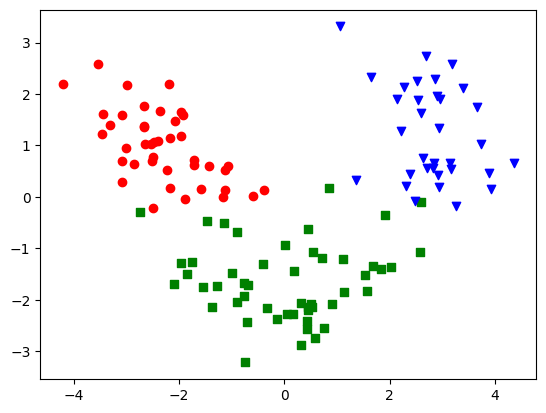

In [156]:
colors = ['r', 'g', 'b']
markers = ['o', 's', 'v']

for c, m, l in zip( colors, markers, np.unique( y_train ) ):
    plt.scatter( X_train_PCA[ y_train == l, 0],
                 X_train_PCA[ y_train == l, 1],
                color = c, marker = m, label = f"class {l}" )

## Scikit Imp.

In [218]:
from matplotlib.colors import ListedColormap

def plot_decision_regions( X, y, classifier, resolution = 0.02 ):
    
    markers = ( 'o', 's', '<', '>', 'v' )
    colors = ( "red", "blue", "green", "lightgray", "cyan" )
    cmap = ListedColormap( colors[:len( np.unique(y)) ] )

    x1_min, x1_max = ( X[:, 0].min() - 1 ), ( X[:, 0].max() + 1 )
    x2_min, x2_max = ( X[:, 1].min() - 1 ), ( X[:, 1].max() + 1 )

    xx1, xx2 = np.meshgrid( np.arange( x1_min, x1_max, resolution ), np.arange( x2_min, x2_max, resolution )) 
    lab = classifier.predict( np.array([xx1.ravel(), xx2.ravel()]).T )
    lab = lab.reshape(xx1.shape)

    plt.contourf( xx1, xx2, lab, alpha = 0.3, cmap = cmap )
    plt.xlim( xx1.min(), xx1.max() )
    plt.ylim( xx2.min(), xx2.max() )

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter( x = X[ y == cl, 1],
                     y = X[ y == cl, 0],
                    alpha = 0.8,
                    color = colors[idx],
                    marker = markers[idx], )

In [158]:
from sklearn.decomposition import PCA
from sklearn.linear_model  import LogisticRegression

In [159]:
lr = LogisticRegression( multi_class="ovr", random_state=0, solver="lbfgs" )

In [169]:
pca = PCA( n_components=2 )

In [176]:
X_train_pca = pca.fit_transform( X_train_std )
X_test_pca = pca.transform( X_test_std )

In [177]:
lr.fit( X_train_pca, y_train )

/home/ahmed4/ml.py/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=0)

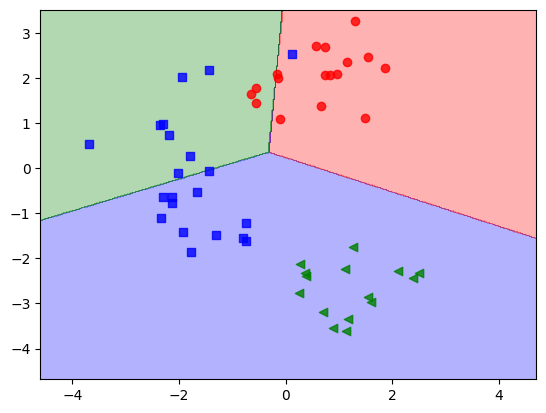

In [178]:
plot_decision_regions( classifier = lr, X = X_test_pca, y = y_test )

## Assessing each faeture's contribution.

In [ ]:
'''
    loadings : Not only the whole variance of features is important to use. Sometimes, we would like
    to know how each feature is contributing to the principal component.
'''

In [179]:
loadings = eign_vecs * np.sqrt(eign_vals)

In [195]:
df.columns[1:]

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13')]

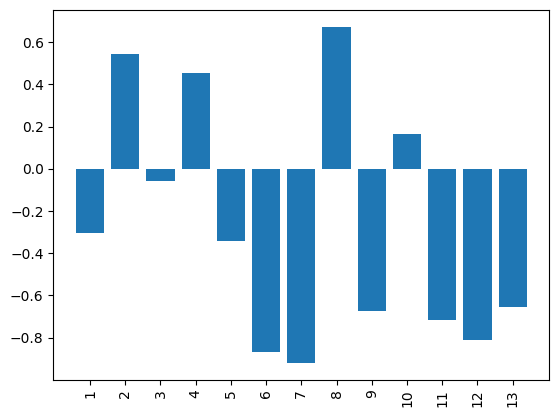

In [201]:
fig, ax = plt.subplots()
ax.bar( range(len(eign_vals)), loadings[:,0] )
ax.set_xticks( range(len(eign_vals)) )
ax.set_xticklabels( df.columns[1:], rotation = 90 )

# Linear Discriminant Analysis ( LDA )

In [ ]:
'''
    LDA differs from PCA in the follwing way : it tries to maximize the seperation between the classes.
    what that means is maximizing the mean difference between classes and minmizing their own `scatter 
    or variance`.
'''

In [9]:
import numpy as np

In [16]:
np.set_printoptions( precision=2 )

In [33]:
labels = np.array(range(len(np.unique( y_train ))))+1

In [34]:
labels

array([1, 2, 3])

In [45]:
y_train.shape

(124,)

In [61]:
X_train_std[ y_train == 2 ].shape

(50, 13)

In [72]:
mean_vecs = []
for i in labels:
    mean_vecs.append(np.mean(X_train_std[ y_train == i ], axis = 0))

In [85]:
list(range(len(mean_vecs)))

[0, 1, 2]

In [94]:
mv = mean_vecs[0]

In [80]:
dims = X_train_std.shape[1]

In [97]:
S_W = np.zeros( ( dims, dims ) )
for label, mv in zip( labels , mean_vecs ):
    class_scatter = np.zeros( ( dims, dims ) )
    for row in X_train_std[ y_train == label ]:
        row, mv = row.reshape(dims,1), mv.reshape(dims,1)
        class_scatter += ( row - mv ).dot( ( row - mv ).T )
    S_W += class_scatter

In [101]:
np.bincount(y_train)[1:]

array([41, 50, 33])

In [181]:
'''
    As you can see above, the distribution of classes dont look like a normal
    distrubtion, and that violates our assumptions. So, we end up dividing the scatter
    matrix with the number of unique classes. Fortunately, that yields the formula
    of covariance !
'''

'\n    As you can see above, the distribution of classes dont look like a normal\n    distrubtion, and that violates our assumptions. So, we end up dividing the scatter\n    matrix with the number of unique classes. Fortunately, that yields the formula\n    of covariance !\n'

In [180]:
S_W = np.zeros( (dims,dims) )
for label, mv in zip( labels, mean_vecs ):
    scatter += np.cov( X_train_std[ y_train == label ].T )
    S_W += scatter

In [182]:
mean_overall = X_train_std.mean( axis = 0 )

In [183]:
mean_overall = mean_overall.reshape( dims, 1 )

In [ ]:
'''
    After we have computed the within-scatter, or within-varinace, 
    we can move to the between-class matrix.
'''

In [184]:
S_B = np.zeros( ( dims, dims ) )

In [185]:
for i, mv in enumerate( mean_vecs ):
    n  = X_train_std[ y_train == i+1 ].shape[0]
    mv = mv.reshape( dims, 1 )
    S_B += n * ( mv - mean_overall ).dot( ( mv - mean_overall ).T )

In [ ]:
'''
    After we have computed S_B and S_W now we can select
    linear discriminants.
'''

In [196]:
eign_vals, eign_vecs = np.linalg.eig( np.dot( np.linalg.inv(S_W), S_B ) )

In [197]:
eign_pairs = [ ( np.abs(eign_vals[i]), eign_vecs[:, i] ) for i in range( len( eign_vals ) ) ]

In [ ]:
sorted( eign_pairs, key = lambda k: k[0], reverse=True )

In [199]:
tot = sum(eign_vals.real)

In [200]:
discr = [( i / tot ) for i in sorted( eign_vals, reverse=True )]

In [202]:
cum_discr = np.cumsum( discr )

In [203]:
import matplotlib.pyplot as plt

/home/ahmed4/ml.py/ml/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ahmed4/ml.py/ml/lib/python3.12/site-packages/matplotlib/transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/home/ahmed4/ml.py/ml/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


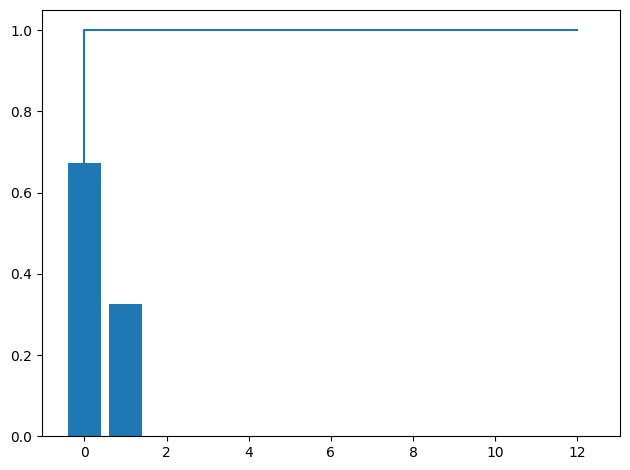

In [193]:
plt.bar( range(len(eign_vals.real)), discr )
plt.step( range(len(eign_vals.real)), cum_discr )
plt.tight_layout()
plt.show()

In [204]:
w = np.hstack( (eign_pairs[0][1][:, np.newaxis].real, eign_pairs[0][1][:, np.newaxis].real) )

In [205]:
w

array([[ 0.75,  0.75],
       [-0.08, -0.08],
       [-0.24, -0.24],
       [ 0.25,  0.25],
       [-0.06, -0.06],
       [ 0.11,  0.11],
       [ 0.  ,  0.  ],
       [-0.03, -0.03],
       [ 0.07,  0.07],
       [-0.06, -0.06],
       [ 0.19,  0.19],
       [-0.09, -0.09],
       [-0.5 , -0.5 ]])

In [ ]:
'''
    Using the transformation matrix lets convert the weight space.
    X' = X.W
'''

In [206]:
X_train_LDA = X_train_std.dot( w )

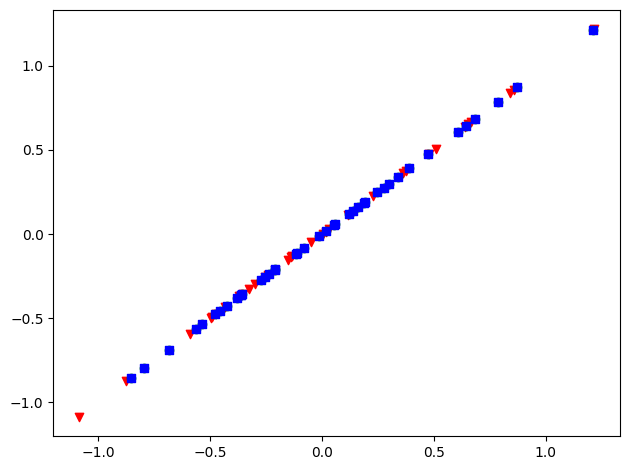

In [207]:
colors = ['r','g','b']
markers = ['v','o','s']

for c, m, l in zip( colors, markers, y_train ):
    plt.scatter( X_train_LDA[ y_train == l, 0 ], X_train_LDA[ y_train == l, 1 ], c = c, marker = m, label = f"Clas{l}" )

plt.tight_layout()
plt.show()

In [212]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [213]:
lda = LinearDiscriminantAnalysis( n_components=2 )

In [214]:
X_train_lda = lda.fit_transform( X_train_std, y_train ) 

In [215]:
lr = LogisticRegression( multi_class="ovr", solver="lbfgs", random_state=0 )

In [217]:
lr.fit( X_train_lda, y_train )

/home/ahmed4/ml.py/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=0)

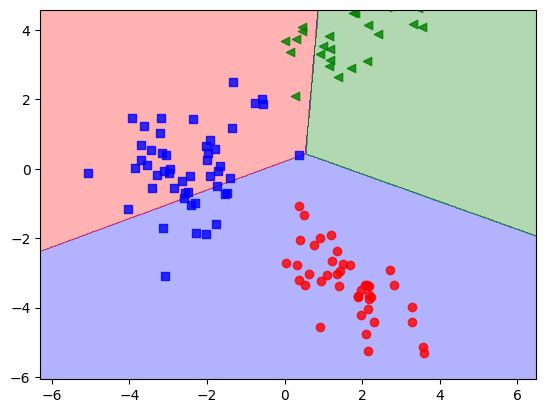

In [219]:
plot_decision_regions( X_train_lda, y_train, classifier=lr )

# Non-linear dim. reduction. ( t-SNE )

## T-SNE

In [220]:
from sklearn.datasets import load_digits

In [221]:
digits = load_digits()

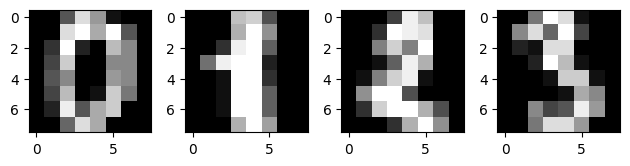

In [238]:
fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow( digits.images[i], cmap = "grey" )
plt.tight_layout()
plt.show()

In [235]:
digits.data.shape

(1797, 64)

In [246]:
X_digits = digits.data
y_digits = digits.target

In [248]:
from sklearn.manifold import TSNE

tsne = TSNE( n_components=2, init="pca", random_state=0)

In [250]:
X_digits_tsne = tsne.fit_transform( X_digits )

In [252]:
X_digits_tsne.shape

(1797, 2)

In [ ]:
for i in range(10):
    xtext, ytext = np.median( X[ i == colors, : ], axis = 0 )
    print(xtext)
    print(ytext)

In [284]:
def plot_proj( X, colors ):
    f = plt.figure( figsize = (8,8) )
    ax = plt.subplot( aspect = "equal" )

    for i in range(10):
        plt.scatter( X[ i == colors, 0], X[ i == colors, 1] )

    for i in range(10):
        xtext, ytext = np.median( X[ i == colors, : ], axis = 0 )
        print("xtext :", xtext )
        print("ytext :", ytext )

xtext : 1.4856641
ytext : -54.339214
xtext : 5.255334
ytext : 12.623518
xtext : -28.050234
ytext : 29.502539
xtext : -37.837547
ytext : -2.194054
xtext : 43.050484
ytext : 12.961863
xtext : 1.8386695
ytext : -19.237312
xtext : 34.820904
ytext : -21.995064
xtext : 8.242352
ytext : 43.228695
xtext : -11.515963
ytext : 5.7552843
xtext : -22.500301
ytext : -17.943241


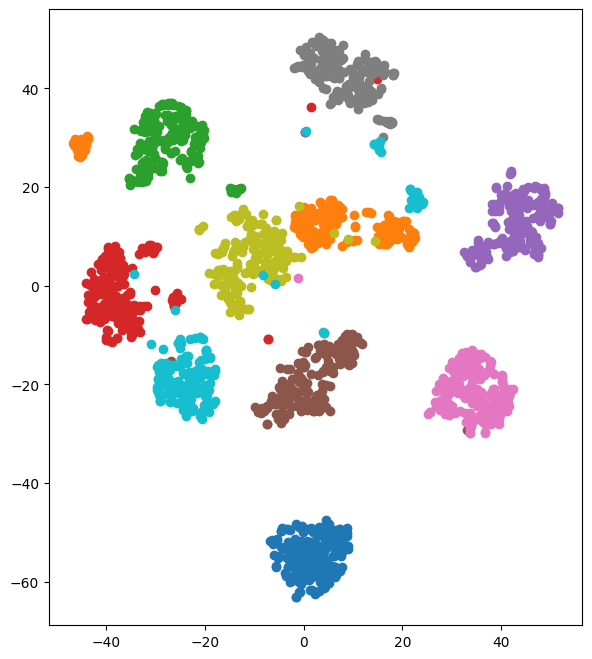

In [285]:
plot_proj( X_digits_tsne, y_digits )
plt.show()